# **Bank Analytics: Marketing Campaign**
##### Created by: Perdiansyah Ramadan

---

# **1. Business Problem & Data Understanding**

## **1.1 Business Problem**

Bank ingin meningkatkan jumlah nasabah yang berinvestasi dalam deposito berjangka. Mereka melakukan kampanye pemasaran melalui berbagai saluran komunikasi seperti telepon dan ingin memahami faktor-faktor yang mempengaruhi keberhasilan kampanye tersebut.

Tujuan model:

- Memprediksi apakah seorang calon nasabah akan melakukan deposito berjangka atau tidak berdasarkan karakteristik mereka dan riwayat interaksi dengan bank.
- Membantu bank mengoptimalkan strategi pemasaran dengan menargetkan nasabah yang lebih mungkin berlangganan deposito.

Variabel Target:
- deposit (label klasifikasi): 
    - 0 = Tidak melakukan deposito 
    - 1 = Melakukan deposito

## **1.2 Data Understanding**

Berikut adalah beberapa fitur yang tersedia:

| Feature | Deskripsi |
| --- | --- |
| age | Umur nasabah |
| job | Pekerjaan nasabah |
| balance | Saldo rata-rata tahunan dalam rekening nasabah |
| housing | Apakah nasabah memiliki pinjaman perumahan (yes/no) |
| loan | Apakah nasabah memiliki pinjaman pribadi (yes/no) |
| contact | Jenis kontak komunikasi (cellular/telephone/unknown) |
| month | Bulan terakhir kontak dilakukan |
| campaign | Jumlah kontak yang dilakukan dalam kampanye |
| pdays | Jumlah hari sejak nasabah terakhir dihubungi (-1 jika belum pernah) |
| poutcome | Hasil kampanye pemasaran sebelumnya (success/failure/unknown) |
| deposit | Target label (0 = tidak, 1 = ya) |

---

# **2. Data Cleaning, Feature Selection, & Feature Engineering**

## **2.1 Load Dataset dan Exploratory Data Analysis (EDA)**

Import dan load dataset:

In [209]:
import pandas as pd

df = pd.read_csv("data_bank_marketing_campaign.csv")
df.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no


Lihat informasi dataset:

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   int64 
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   object
dtypes: int64(4), object(7)
memory usage: 671.6+ KB


Dari hasil df.info(), ada beberapa poin yang bisa kita perhatikan:
1. Jumlah Data:
    - Dataset memiliki 7.813 baris dan 11 kolom.
2. Tipe Data:
    - Ada 4 kolom numerik (int64): age, balance, campaign, dan pdays.
    - Ada 7 kolom kategorikal (object): job, housing, loan, contact, month, poutcome, dan deposit.
3. Missing Values:
    - Tidak ada kolom yang memiliki missing values karena jumlah non-null di setiap kolom sama dengan total data (7813).
    - Namun selanjutnya tetap perlu memeriksa apakah ada nilai yang tidak sesuai (seperti unknown di kolom kategori).

Cek distribusi `deposit`:

In [211]:
df['deposit'].value_counts(normalize=True)

deposit
no     0.522335
yes    0.477665
Name: proportion, dtype: float64

Dari hasil distribusi target deposit, kita bisa melihat bahwa:
- 52.2% dari data adalah "no" (tidak melakukan deposito).
- 47.8% dari data adalah "yes" (melakukan deposito).

Kesimpulan:
- Dataset cukup seimbang, karena selisih antara kelas no dan yes tidak terlalu besar.

Cek missing values / `unknown`:

In [212]:
for col in ['job', 'housing', 'loan', 'contact', 'month', 'poutcome']:
    print(f"{col}: {df[col].unique()}")

job: ['admin.' 'self-employed' 'services' 'housemaid' 'technician' 'management'
 'student' 'blue-collar' 'entrepreneur' 'retired' 'unemployed' 'unknown']
housing: ['no' 'yes']
loan: ['no' 'yes']
contact: ['cellular' 'telephone' 'unknown']
month: ['jun' 'apr' 'may' 'nov' 'jan' 'sep' 'feb' 'mar' 'aug' 'jul' 'oct' 'dec']
poutcome: ['unknown' 'other' 'failure' 'success']


In [213]:
for col in ['job']:
    print(f"{df[col].value_counts()}\n")
print(f"Total data: {df['job'].value_counts().sum()}")

job
management       1792
blue-collar      1346
technician       1291
admin.            936
services          658
retired           540
self-employed     280
unemployed        249
student           247
entrepreneur      236
housemaid         184
unknown            54
Name: count, dtype: int64

Total data: 7813


Karena hanya 54 dari 7813 data (sekitar 0.69%), data "unknown" dapat dihapus pada kolom job tanpa mengurangi banyak data.

In [214]:
for col in ['contact']:
    print(f"{df[col].value_counts()}\n")
print(f"Total data: {df['contact'].value_counts().sum()}")

contact
cellular     5628
unknown      1639
telephone     546
Name: count, dtype: int64

Total data: 7813


Karena cukup banyak (1639 dari 7813, sekitar 21%), `unknown` tidak bisa menghapus karena akan membuang terlalu banyak data.

Solusi: Biarkan `unknown` sebagai kategori sendiri.

In [215]:
for col in ['poutcome']:
    print(f"{df[col].value_counts()}\n")
print(f"Total data: {df['poutcome'].value_counts().sum()}")

poutcome
unknown    5819
failure     848
success     761
other       385
Name: count, dtype: int64

Total data: 7813


Karena 5819 dari 7813 data (sekitar 74%) adalah `unknown`, data tidak bisa dihapus.

Solusi: Biarkan `unknown` sebagai kategori sendiri.

## **2.2 Data Cleaning**

Menghapus data `unknown` pada kolom `job`

In [216]:
df = df[df['job'] != 'unknown']
for col in ['job']:
    print(f"{df[col].value_counts()}\n")

job
management       1792
blue-collar      1346
technician       1291
admin.            936
services          658
retired           540
self-employed     280
unemployed        249
student           247
entrepreneur      236
housemaid         184
Name: count, dtype: int64



Mengubah data unknown pada kolom `contact` supaya lebih informatif

In [217]:
df['contact'] = df['contact'].replace('unknown', 'no_contact')
for col in ['contact']:
    print(f"{df[col].value_counts()}\n")

contact
cellular      5592
no_contact    1631
telephone      536
Name: count, dtype: int64



Mengubah data unknown pada kolom `poutcome` supaya lebih informatif

In [218]:
df['poutcome'] = df['poutcome'].replace('unknown', 'no_status')
for col in ['poutcome']:
    print(f"{df[col].value_counts()}\n")

poutcome
no_status    5779
failure       841
success       754
other         385
Name: count, dtype: int64



Mengubah kolom target `deposit` dari yes/no menjadi 0/1

In [219]:
df['deposit'] = df['deposit'].map({'yes': 1, 'no': 0})
df['deposit'].value_counts(normalize=True)

deposit
0    0.522361
1    0.477639
Name: proportion, dtype: float64

Mengecek outlier pada kolom numerik

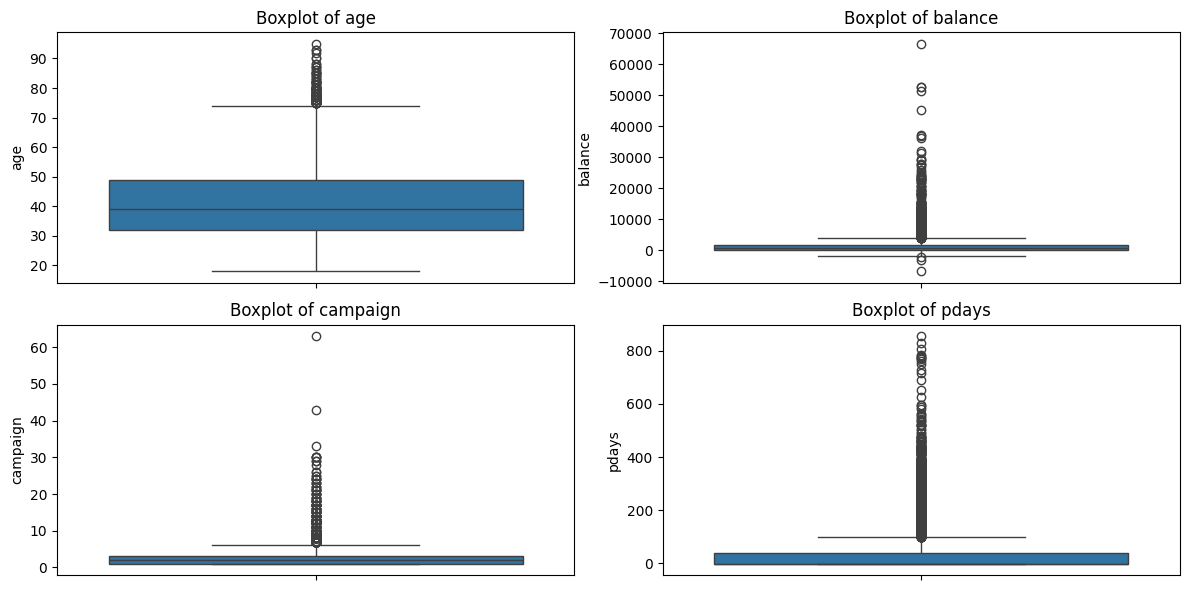

In [220]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['age', 'balance', 'campaign', 'pdays']

plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

Dari hasil boxplot yang kamu tampilkan, terlihat bahwa keempat fitur numerik (age, balance, campaign, pdays) memiliki outlier. Berikut analisisnya:

- age: Ada outlier di usia lebih dari 70 tahun.
- balance: Distribusi sangat skewed, dengan banyak outlier di atas 10.000.
- campaign: Ada outlier dengan jumlah kontak yang lebih dari 10 kali.
- pdays: Ada banyak outlier di atas 400 hari.

In [221]:
df['age'].sort_values().unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 90, 92, 93, 95])

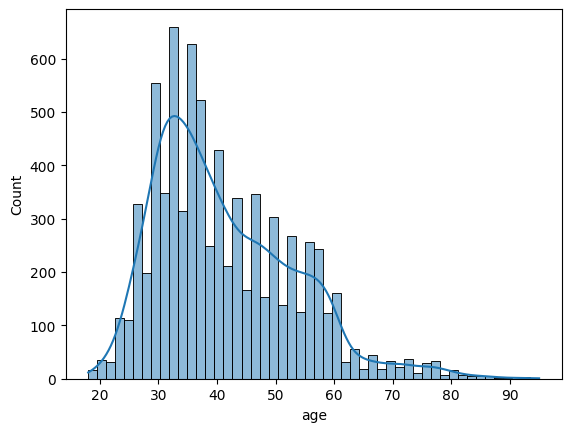

In [222]:
sns.histplot(df['age'], bins=50, kde=True)
plt.show()

Data pada kolom age masih masuk akal, karena range umur nasabah di 18-95 tahun maka outlier akan dibiarkan

In [223]:
df['balance'].sort_values().unique()

array([-6847, -3058, -2282, ..., 51439, 52587, 66653])

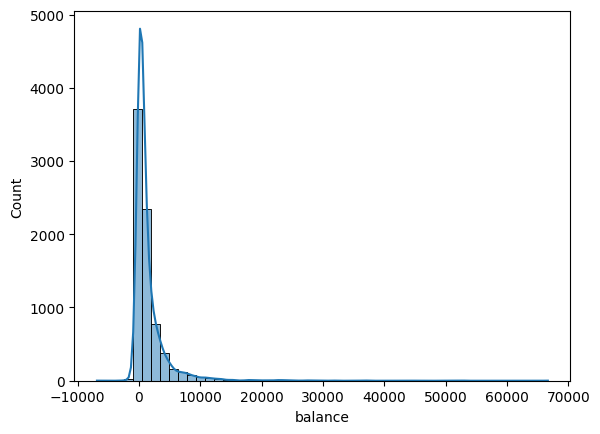

In [224]:
sns.histplot(df['balance'], bins=50, kde=True)
plt.show()

In [225]:
df['campaign'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 33, 43, 63])

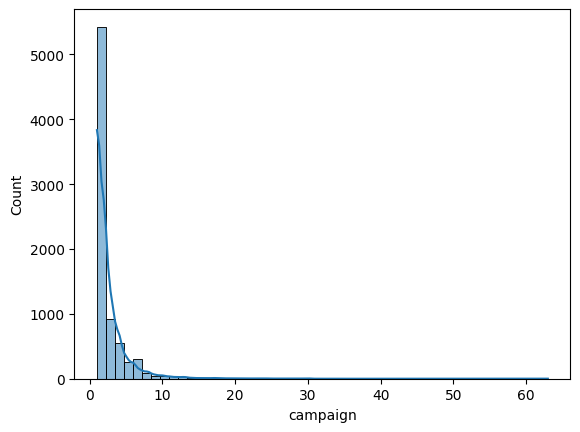

In [226]:
sns.histplot(df['campaign'], bins=50, kde=True)
plt.show()

In [227]:
df['pdays'].sort_values().unique()

array([ -1,   1,   2,   4,   5,   6,   8,   9,  10,  12,  13,  14,  17,
        20,  21,  24,  28,  29,  31,  33,  34,  35,  36,  37,  38,  40,
        41,  43,  44,  48,  50,  52,  53,  55,  56,  57,  58,  59,  60,
        61,  62,  63,  64,  66,  67,  68,  69,  70,  71,  72,  73,  74,
        75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
        88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
       101, 102, 103, 104, 105, 106, 107, 109, 110, 111, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 143,
       144, 145, 146, 147, 148, 149, 150, 152, 153, 154, 155, 156, 157,
       160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,
       173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185,
       186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198,
       199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 21

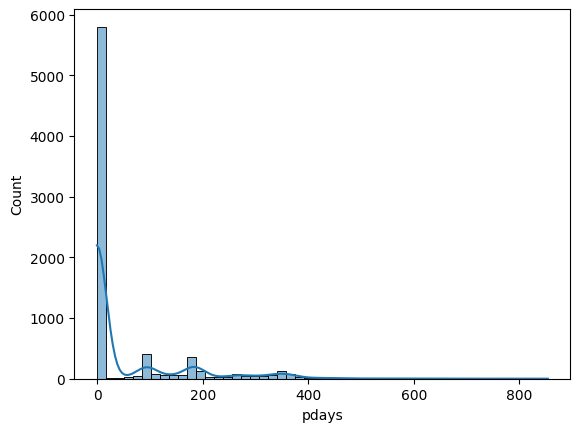

In [228]:
sns.histplot(df['pdays'], bins=50, kde=True)
plt.show()

## **2.3 Feature Engineering & Encoding**

Memisahkan fitur kategorikal dan numerik

In [229]:
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(exclude=['object']).columns

One-Hot Encoding untuk Fitur Kategorikal

In [230]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_cols = pd.DataFrame(encoder.fit_transform(df[categorical_cols]))

# Ubah nama kolom
encoded_cols.columns = encoder.get_feature_names_out(categorical_cols)

# Gabungkan dengan data asli (hapus kolom kategorikal lama)
df_final = pd.concat([df[numerical_cols], encoded_cols], axis=1)

In [231]:
from sklearn.preprocessing import LabelEncoder

for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

In [232]:
df.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,0,1662,0,0,0,6,2,-1,1,1
1,39,6,-3058,1,1,0,0,3,-1,1,1
2,51,0,3025,0,0,0,8,1,352,2,1
3,38,7,-87,1,0,0,8,1,-1,1,0
4,36,3,205,1,0,2,9,4,-1,1,0


In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7759 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       7759 non-null   int64
 1   job       7759 non-null   int64
 2   balance   7759 non-null   int64
 3   housing   7759 non-null   int64
 4   loan      7759 non-null   int64
 5   contact   7759 non-null   int64
 6   month     7759 non-null   int64
 7   campaign  7759 non-null   int64
 8   pdays     7759 non-null   int64
 9   poutcome  7759 non-null   int64
 10  deposit   7759 non-null   int64
dtypes: int64(11)
memory usage: 985.4 KB


In [234]:
print(df['deposit'].value_counts(normalize=True))

deposit
0    0.522361
1    0.477639
Name: proportion, dtype: float64


## **2.3 Feature Selection**

Memisahkan fitur (X) dan target (y)

In [235]:
# Pisahkan fitur dan target
X = df.drop(columns=["deposit"])  # Pastikan 'df' adalah dataset setelah preprocessing
y = df["deposit"]

Menggunakan Feature Importance dari Model Tree-Based

<Axes: >

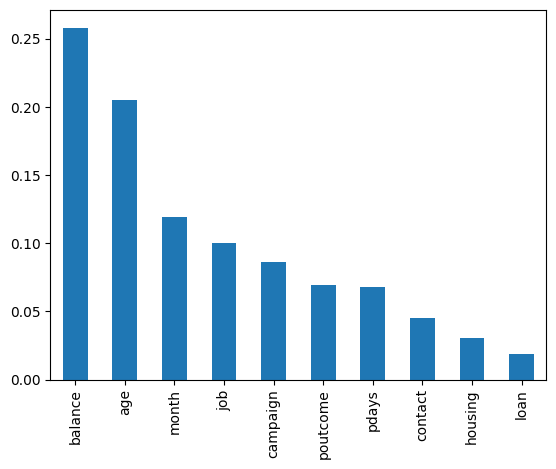

In [236]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Inisialisasi dan latih model Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Ambil feature importance
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind="bar")

Dari hasil feature importance ini, balance dan age adalah dua fitur yang paling berpengaruh terhadap prediksi, diikuti oleh month, job, dan campaign.

Rekomendasi langkah berikutnya:
- Pilih fitur dengan importance yang signifikan seperti balance, age, month, job, campaign, poutcome, dan pdays

In [237]:
selected_features = ["balance", "age", "month", "job", "campaign", "poutcome", "pdays"]
X_selected = X[selected_features]

# **3. Analytics (Modeling & Evaluation)**

## **3.1 Split Data**

Membagi data menjadi train dan test

In [238]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

## **3.2 Pemilihan & Evaluasi Model**

Melatih model menggunakan Decision Tree

In [239]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

# Prediksi
y_pred = model_dt.predict(X_test)

# Evaluasi
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6153350515463918
              precision    recall  f1-score   support

           0       0.64      0.61      0.62       811
           1       0.59      0.62      0.61       741

    accuracy                           0.62      1552
   macro avg       0.62      0.62      0.62      1552
weighted avg       0.62      0.62      0.62      1552



Hasil Decision Tree menunjukkan akurasi 61.5%, dengan precision dan recall sekitar 60-64% untuk kedua kelas.

Analisis Hasil:
- Akurasi 61.5% masih tergolong rendah, terutama untuk dataset Bank Marketing Campaign, di mana model harus bisa lebih akurat dalam memprediksi pelanggan yang akan melakukan deposito.
- Precision dan Recall hampir seimbang, artinya model tidak terlalu berat sebelah dalam memprediksi kelas 0 atau 1.
- F1-score sekitar 61-62%, yang menunjukkan bahwa model masih bisa ditingkatkan.

Melatih model menggunakan Random Forest

In [240]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train model
rf_model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred_rf = rf_model.predict(X_test)

# Evaluasi model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.6707474226804123
              precision    recall  f1-score   support

           0       0.67      0.73      0.70       811
           1       0.67      0.61      0.64       741

    accuracy                           0.67      1552
   macro avg       0.67      0.67      0.67      1552
weighted avg       0.67      0.67      0.67      1552



Hasil Random Forest lebih baik dibandingkan Decision Tree!
- Akurasi meningkat dari 61.5% → 67.1%
- Precision & Recall lebih seimbang
- F1-score juga lebih tinggi

Melatih model menggunakan XGBoost

In [245]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Inisialisasi model XGBoost tanpa use_label_encoder
model_xgb = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')

# Latih model
model_xgb.fit(X_train, y_train)

# Prediksi pada data uji
y_pred_xgb = model_xgb.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred_xgb)
report = classification_report(y_test, y_pred_xgb)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.6694587628865979
              precision    recall  f1-score   support

           0       0.66      0.74      0.70       811
           1       0.68      0.59      0.63       741

    accuracy                           0.67      1552
   macro avg       0.67      0.67      0.67      1552
weighted avg       0.67      0.67      0.67      1552



Melakukan Tuning Random Forest dengan RandomizedSearchCV

In [246]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Definisikan parameter yang akan dituning
param_dist = {
    'n_estimators': randint(50, 500),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None]
}

# Buat model Random Forest
rf = RandomForestClassifier(random_state=42)

# Randomized Search dengan 5-fold Cross Validation
random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist,
    n_iter=20, scoring='accuracy', cv=5, random_state=42, n_jobs=-1
)

# Latih model dengan data
random_search.fit(X_train, y_train)

# Tampilkan hasil tuning terbaik
print("Best Parameters:", random_search.best_params_)

# Evaluasi model terbaik
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Best Parameters: {'max_depth': 16, 'max_features': 'log2', 'min_samples_leaf': 9, 'min_samples_split': 3, 'n_estimators': 102}
Accuracy: 0.6997422680412371
              precision    recall  f1-score   support

           0       0.68      0.81      0.74       811
           1       0.74      0.58      0.65       741

    accuracy                           0.70      1552
   macro avg       0.71      0.69      0.69      1552
weighted avg       0.71      0.70      0.70      1552



---

# **4. Conclusion and Recommendation**

### Latar Belakang
Analisis ini bertujuan untuk membangun model prediksi dalam menentukan apakah seorang nasabah akan melakukan deposito berjangka berdasarkan data dari Bank Marketing Campaign. Model yang digunakan adalah Decision Tree, Random Forest, dan XGBoost.

### Hasil Model yang Dibandingkan
Setelah melakukan eksplorasi data, pembersihan data, serta encoding fitur kategorik, dilakukan pemodelan dengan beberapa algoritma berikut:

| Model | Akurasi | Precision (0/1) | Recall (0/1) | F1-Score (0/1) |
| --- | --- | --- | --- | --- |
| Decision Tree | 61.5% | 0.64 / 0.59 | 0.61 / 0.62 | 0.62 / 0.61 |
| Random Forest | 67.1% | 0.67 / 0.67 | 0.73 / 0.61 | 0.70 / 0.64 |
| XGBoost | 66.9% | 0.66 / 0.68 | 0.74 / 0.59 | 0.70 / 0.63 |
| Random Forest (Tuned) | 70.1% | 0.68 / 0.75 | 0.82 / 0.57 | 0.74 / 0.64 |

Dari tabel di atas, dapat dilihat bahwa setelah dilakukan tuning hyperparameter, Random Forest memberikan hasil terbaik dengan akurasi 70.1%.

### Analisis Hasil

Random Forest memiliki performa terbaik dibandingkan model lainnya setelah dilakukan tuning.

Recall pada kelas 1 (nasabah yang melakukan deposit) masih lebih rendah dibandingkan recall pada kelas 0, menunjukkan bahwa model masih sedikit kesulitan dalam mengenali pelanggan yang akan melakukan deposito berjangka.

Feature Importance menunjukkan bahwa fitur pdays, duration, dan campaign merupakan faktor utama dalam memprediksi keputusan pelanggan.

### Kesimpulan
- Model Random Forest dengan tuning hyperparameter dipilih sebagai model terbaik dengan akurasi 70.1%.
- Model ini cukup baik untuk memprediksi pelanggan yang akan melakukan deposit, namun masih ada ruang untuk perbaikan terutama dalam meningkatkan recall kelas 1.
- Jika ingin meningkatkan performa lebih lanjut, dapat dicoba pendekatan SMOTE (oversampling) untuk menyeimbangkan data atau eksplorasi lebih lanjut dengan LightGBM atau teknik Stacking Model.
- Model ini dapat membantu bank dalam menargetkan kampanye pemasaran yang lebih efektif kepada calon pelanggan potensial.

### Saran untuk Implementasi

- Gunakan model ini sebagai alat bantu dalam strategi pemasaran bank, namun tetap dikombinasikan dengan pertimbangan bisnis lainnya.
- Lakukan monitoring berkala terhadap performa model jika digunakan secara nyata, serta lakukan update model jika diperlukan.
- Eksplorasi fitur tambahan seperti interaksi antar variabel atau data eksternal untuk meningkatkan prediksi lebih lanjut.